# Plots For Energy Aware FaaS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy.stats.mstats import gmean

In [2]:
plt.rcParams["figure.figsize"] = (8, 4)
sns.set(style="whitegrid", font_scale=1.40)

In [3]:
def read_jsonl(path):
    with open(path) as fp:
        lines = fp.readlines()
    experiments = [json.loads(line) for line in lines]
    return pd.DataFrame.from_records(experiments)

# Task Profiling

In [8]:
task_stats = pd.read_csv("results/sebs_task_energy.csv", index_col=0)
task_stats["energy"] /= 1e6
task_stats["avg_power_W"] /= 1e6
task_stats["machine"] = task_stats["machine"].str.title()
task_stats.loc[task_stats["machine"]=="Faster", "machine"] = "FASTER"
task_stats.loc[task_stats["machine"]=="Midway", "machine"] = "IC"
task_stats.head()

,task_id,run_id,block_id,pid,task_try_time_running,task_try_time_running_ended,running_duration,func_name,funcx_task_id,endpoint_id,time_began,endpoint_status,energy,duration_s,avg_power_W,machine,norm_energy,norm_duration,norm_power,hue
1,79f3efcc-a5ec-40dc-8d53-c338f9ee5320,e23348f0-a618-4ea1-8c1b-4c0704ef1521,e23348f0-a618-4ea1-8c1b-4c0704ef1521.0,132146.0,2023-09-14 14:43:45.573261,2023-09-14 14:45:27.200582,0 days 00:01:41.627321,dna_visualization,79f3efcc-a5ec-40dc-8d53-c338f9ee5320,14d17201-7380-4af8-b4e0-192cb9805274,2023-09-14 09:43:43.575426,WARMING,76.588121,101.627321,0.753617,Theta,1.301341,3.854945,0.224207,1
2,567db34d-34d1-439c-927f-4c4c068d5ae6,e23348f0-a618-4ea1-8c1b-4c0704ef1521,e23348f0-a618-4ea1-8c1b-4c0704ef1521.0,132148.0,2023-09-14 14:45:35.353177,2023-09-14 14:47:17.732371,0 days 00:01:42.379194,dna_visualization,567db34d-34d1-439c-927f-4c4c068d5ae6,14d17201-7380-4af8-b4e0-192cb9805274,2023-09-14 09:45:33.574711,WARM,77.036847,102.379194,0.752466,Theta,1.308966,3.883465,0.223865,1
3,a5c8c454-4e11-4f03-a58c-94f7084ea5ac,e23348f0-a618-4ea1-8c1b-4c0704ef1521,e23348f0-a618-4ea1-8c1b-4c0704ef1521.0,132151.0,2023-09-14 14:45:35.366966,2023-09-14 14:47:17.905304,0 days 00:01:42.538338,dna_visualization,a5c8c454-4e11-4f03-a58c-94f7084ea5ac,14d17201-7380-4af8-b4e0-192cb9805274,2023-09-14 09:45:33.575128,WARM,77.346941,102.538338,0.754322,Theta,1.314235,3.889501,0.224417,1
4,eb18078f-290c-4cca-b9c1-e23298e1a011,e23348f0-a618-4ea1-8c1b-4c0704ef1521,e23348f0-a618-4ea1-8c1b-4c0704ef1521.0,132154.0,2023-09-14 14:47:26.428012,2023-09-14 14:49:07.937986,0 days 00:01:41.509974,dna_visualization,eb18078f-290c-4cca-b9c1-e23298e1a011,14d17201-7380-4af8-b4e0-192cb9805274,2023-09-14 09:47:24.576935,WARM,77.229112,101.509974,0.760803,Theta,1.312233,3.850493,0.226345,1
5,5d3ec2f3-8bb6-4c3a-a8e9-f141f73d3fd2,e23348f0-a618-4ea1-8c1b-4c0704ef1521,e23348f0-a618-4ea1-8c1b-4c0704ef1521.0,132157.0,2023-09-14 14:47:26.437989,2023-09-14 14:49:08.490070,0 days 00:01:42.052081,dna_visualization,5d3ec2f3-8bb6-4c3a-a8e9-f141f73d3fd2,14d17201-7380-4af8-b4e0-192cb9805274,2023-09-14 09:47:24.577362,WARM,77.584557,102.052081,0.760245,Theta,1.318272,3.871057,0.226179,1


In [9]:
func_renames = {
    "dna_visualization": "dna_viz",
    "matrix_multiplication": "matrix_mul",
    "graph_pagerank": "pagerank",
    "video_processing": "video_proc"
}
def rename(n):
    return func_renames.get(n, n)

task_stats["func_name"] = task_stats["func_name"].apply(rename)

In [10]:
task_stats[["machine", "func_name", "energy", "duration_s", "avg_power_W"]].groupby(["machine", "func_name"]).mean()

energy  duration_s  avg_power_W
machine func_name                                       
Desktop compression    0.311794    0.259531     1.196459
        dna_viz      128.376270   11.215357    11.517452
        graph_bfs      0.019418    0.043651     0.442222
        graph_mst      0.002068    0.026055     0.083529
        matrix_mul     0.001234    0.005677     0.203497
        pagerank       0.215822    3.294267     0.072563
        thumbnailer    0.003098    0.037613     0.095014
        video_proc     0.001236    0.532795     0.002338
FASTER  compression    0.441502    0.519391     0.848525
        dna_viz       39.310823   16.261650     2.521358
        graph_bfs      0.051985    0.121279     0.301218
        graph_mst      0.089927    0.133720     0.401869
        matrix_mul     0.017325    0.025783     0.696003
        pagerank       0.052821    0.137693     0.273344
        thumbnailer    0.049956    0.105173     0.365452
        video_proc     0.709704    0.762972     1.015754
IC      compression    1.604426    8.317617     0.293666
        dna_viz       68.758460   16.886554     4.107228
        graph_bfs      0.026049    0.053957     0.411220
        graph_mst      0.017892    0.045086     0.346652
        matrix_mul     0.039944    0.004053     9.938924
        pagerank       3.797341   25.516414     0.353106
        thumbnailer    0.192757    0.761135     0.370685
        video_proc     0.514379    1.066907     0.559367
Theta   compression    2.035210    2.160051     0.992807
        dna_viz       77.475140  101.669377     0.762040
        graph_bfs      0.334707    0.349026     0.723048
        graph_mst      0.334280    0.357156     0.760952
        matrix_mul     0.142579    0.025937     5.503369
        pagerank       0.556602    0.495861     0.917357
        thumbnailer    0.174221    0.241996     0.479800
        video_proc     1.397265    3.608009     0.610284

In [11]:
min_vals = task_stats[["machine", "func_name", "energy", "duration_s", "avg_power_W"]].groupby(["machine", "func_name"]).mean().groupby("func_name").min()
norm_grouped_vals = task_stats[["machine", "func_name", "energy", "duration_s", "avg_power_W"]].groupby(["machine", "func_name"]).mean() / min_vals
norm_grouped_vals = norm_grouped_vals.reset_index()

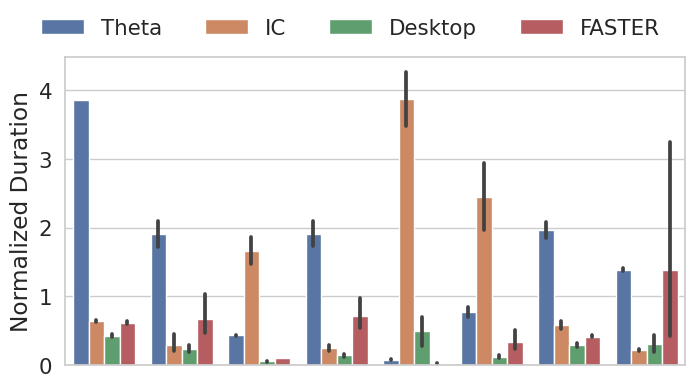

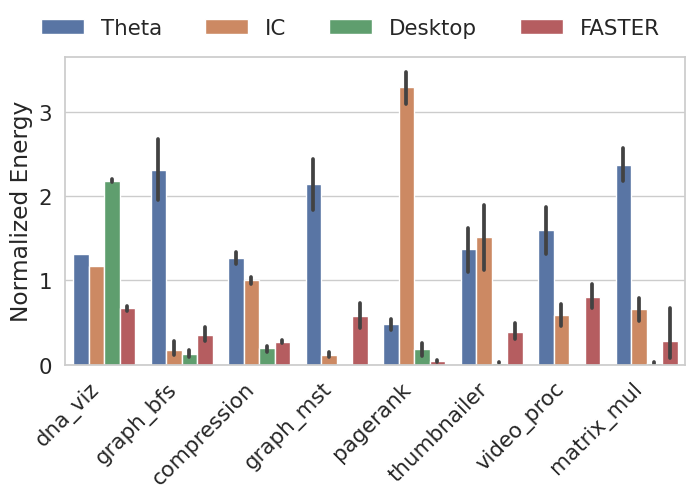

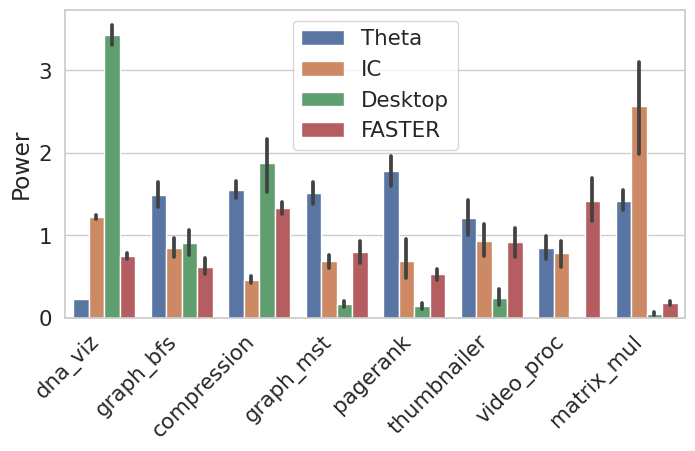

In [12]:
fig, ax = plt.subplots()
chart = sns.barplot(data=task_stats, x="func_name", y=task_stats["norm_duration"], hue="machine", ax=ax)
chart.set_xticklabels([])
plt.ylabel("Normalized Duration")
plt.xlabel(None)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.46, 1), ncol=4, title=None, frameon=False,
)
plt.savefig("figs/time_comparison_sebs_anon.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
chart = sns.barplot(data=task_stats, x="func_name", y=task_stats["norm_energy"], hue="machine", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Normalized Energy")
plt.xlabel(None)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.46, 1), ncol=4, title=None, frameon=False,
)
plt.savefig("figs/energy_comparison_sebs_anon.pdf", bbox_inches="tight")
plt.show()

chart = sns.barplot(data=task_stats, x="func_name", y=task_stats["norm_power"], hue="machine")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Power")
plt.xlabel(None)
chart.legend_.set_title(None)
plt.savefig("figs/power_comparison_sebs_anon.pdf", bbox_inches="tight")
plt.show()

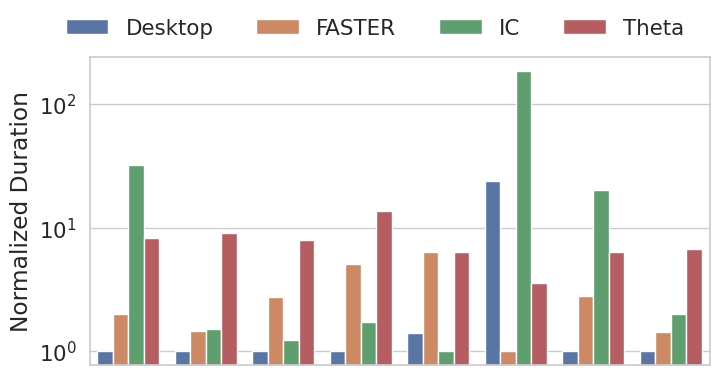

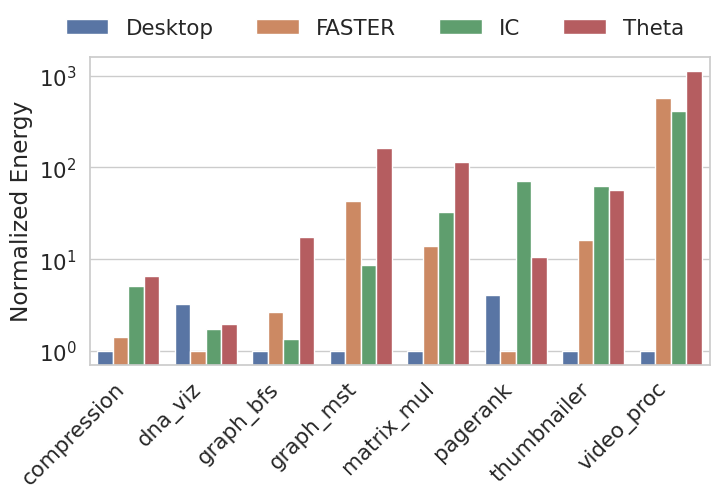

In [50]:
fig, ax = plt.subplots()
chart = sns.barplot(data=norm_grouped_vals, x="func_name", y="duration_s", hue="machine", ax=ax)
chart.set_xticklabels([])
plt.ylabel("Normalized Duration")
plt.xlabel(None)
ax.set_yscale("log")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.46, 1), ncol=4, title=None, frameon=False,
)
plt.savefig("figs/time_comparison_sebs_2.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
chart = sns.barplot(data=norm_grouped_vals, x="func_name", y="energy", hue="machine", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Normalized Energy")
plt.xlabel(None)
ax.set_yscale("log")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.46, 1), ncol=4, title=None, frameon=False,
)
plt.savefig("figs/energy_comparison_sebs_2.pdf", bbox_inches="tight")
plt.show()

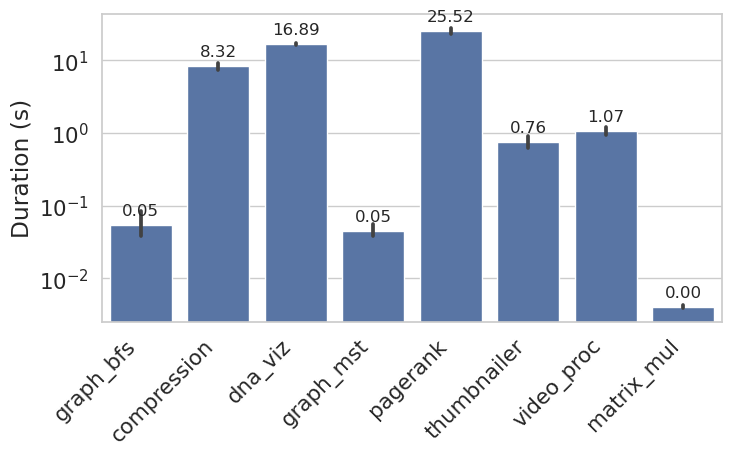

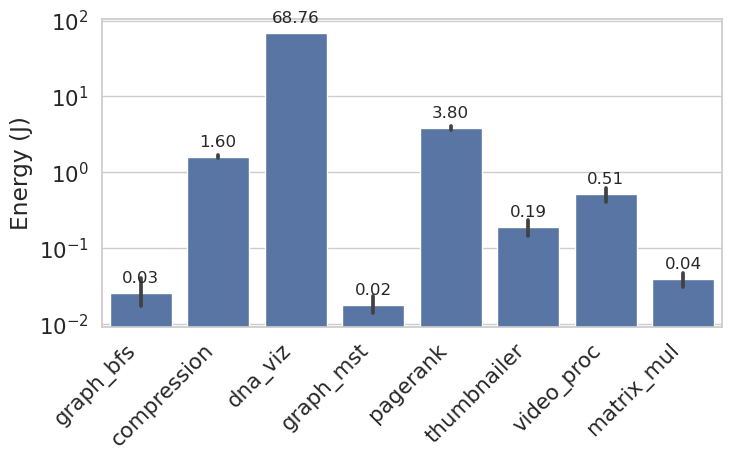

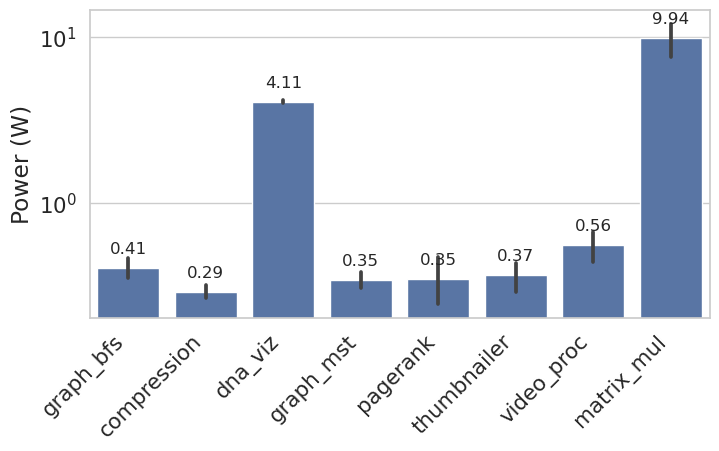

In [22]:
fig, ax = plt.subplots()
chart = sns.barplot(data=task_stats[task_stats["machine"] == "IC"], x="func_name", y="duration_s", hue="hue", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.bar_label(chart.containers[0], fontsize=12, fmt="{:.2f}", padding=5);
plt.ylabel("Duration (s)")
plt.xlabel(None)
chart.get_legend().remove()
# ax.set_ylim((0,1))
ax.set_yscale("log")
plt.savefig("figs/sebs_runtime_midway_anon.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
chart = sns.barplot(data=task_stats[task_stats["machine"] == "IC"], x="func_name", y="energy", hue="hue", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.bar_label(chart.containers[0], fontsize=12, fmt="{:.2f}", padding=5);
plt.ylabel("Energy (J)")
plt.xlabel(None)
chart.get_legend().remove()
# ax.set_ylim((0,1))
ax.set_yscale("log")
plt.savefig("figs/sebs_energy_midway_anon.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
chart = sns.barplot(data=task_stats[task_stats["machine"] == "IC"], x="func_name", y="avg_power_W", hue="hue", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.bar_label(chart.containers[0], fontsize=12, fmt="{:.2f}", padding=8)
plt.ylabel("Power (W)")
plt.xlabel(None)
chart.get_legend().remove()
ax.set_yscale("log")
plt.savefig("figs/sebs_power_midway_anon.pdf", bbox_inches="tight")
plt.show()

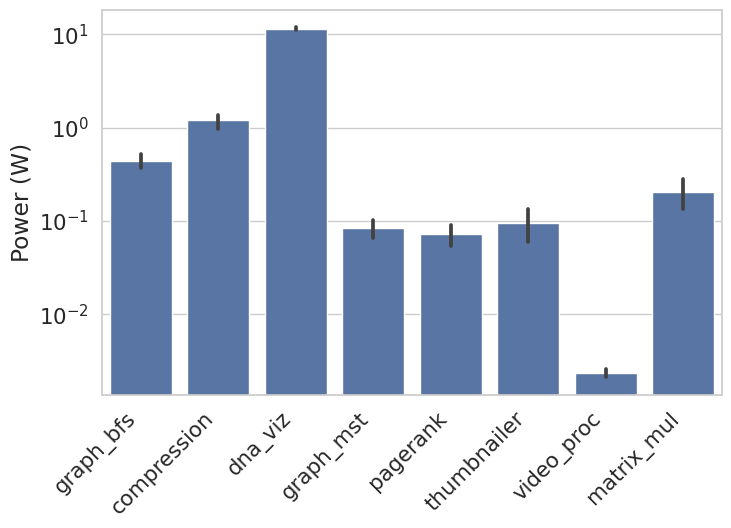

In [16]:
fig, ax = plt.subplots()
chart = sns.barplot(data=task_stats[task_stats["machine"] == "Desktop"], x="func_name", y="avg_power_W", hue="hue", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Power (W)")
plt.xlabel(None)
chart.get_legend().remove()
ax.set_yscale("log")
plt.savefig("figs/sebs_power_desktop.pdf", bbox_inches="tight")
plt.show()

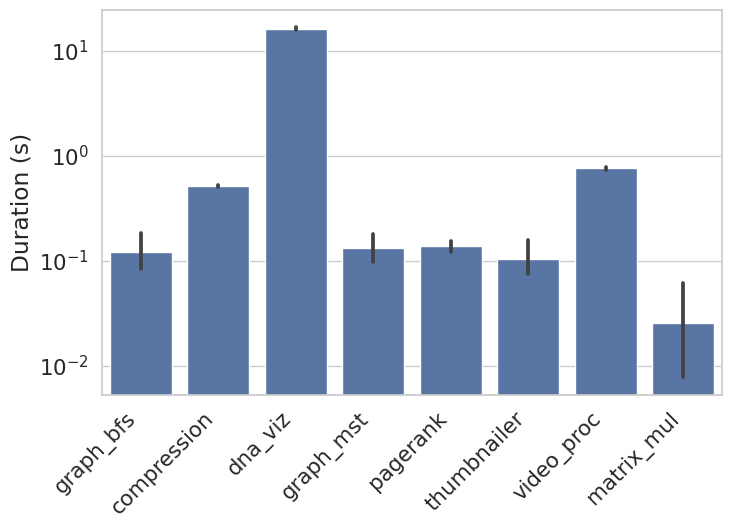

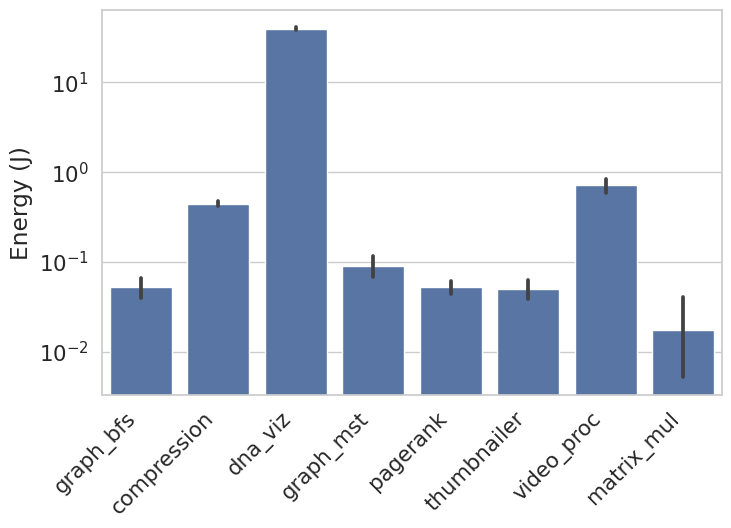

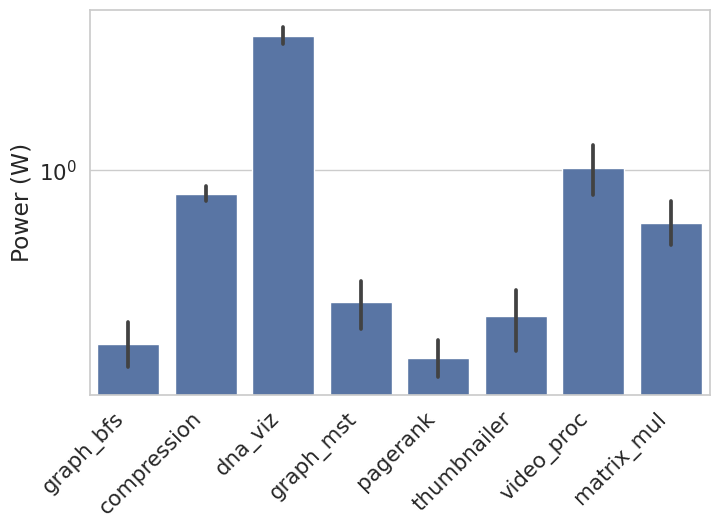

In [15]:
fig, ax = plt.subplots()
chart = sns.barplot(data=task_stats[task_stats["machine"] == "FASTER"], x="func_name", y="duration_s", hue="hue", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Duration (s)")
plt.xlabel(None)
chart.get_legend().remove()
# ax.set_ylim((0,1))
ax.set_yscale("log")
plt.savefig("figs/sebs_runtime_faster.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
chart = sns.barplot(data=task_stats[task_stats["machine"] == "FASTER"], x="func_name", y="energy", hue="hue", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Energy (J)")
plt.xlabel(None)
chart.get_legend().remove()
# ax.set_ylim((0,1))
ax.set_yscale("log")
plt.savefig("figs/sebs_energy_faster.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
chart = sns.barplot(data=task_stats[task_stats["machine"] == "FASTER"], x="func_name", y="avg_power_W", hue="hue", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Power (W)")
plt.xlabel(None)
chart.get_legend().remove()
ax.set_yscale("log")
plt.savefig("figs/sebs_power_faster.pdf", bbox_inches="tight")
plt.show()

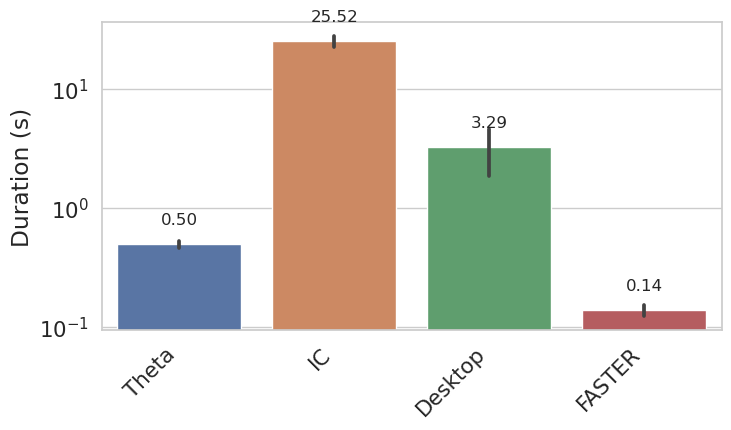

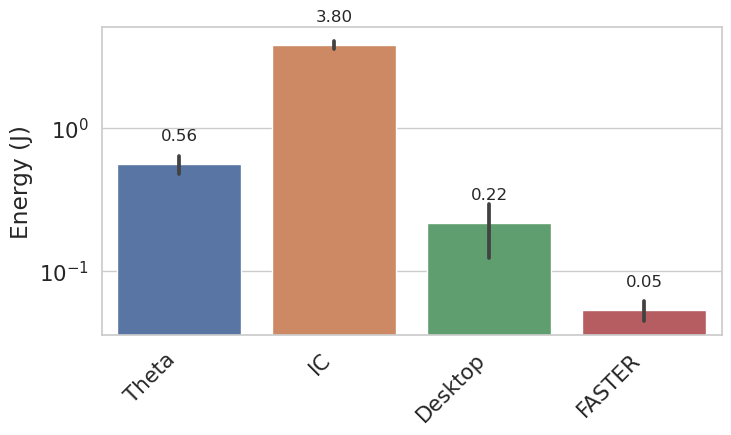

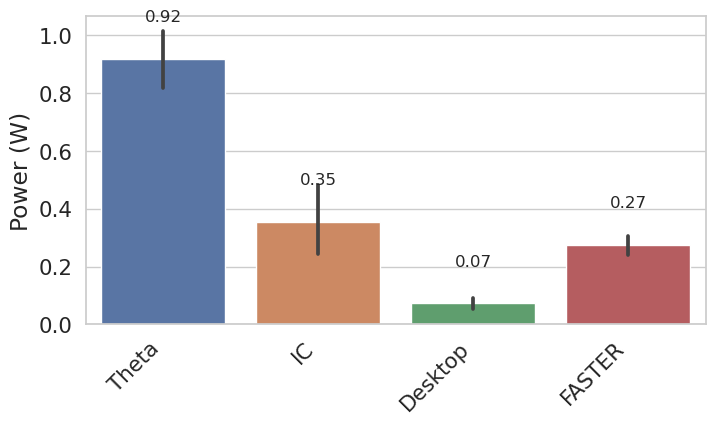

In [27]:
fig, ax = plt.subplots()
chart = sns.barplot(data=task_stats[task_stats["func_name"] == "pagerank"], x="machine", y="duration_s", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.bar_label(chart.containers[0], fontsize=12, fmt="{:.2f}", padding=12)
plt.ylabel("Duration (s)")
plt.xlabel(None)
# chart.get_legend().remove()
ax.set_yscale("log")
plt.savefig("figs/pagerank_runtime_comparison_anon.pdf", bbox_inches="tight")
plt.show()

fig, ax= plt.subplots()
chart = sns.barplot(data=task_stats[task_stats["func_name"] == "pagerank"], x="machine", y="energy", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.bar_label(chart.containers[0], fontsize=12, fmt="{:.2f}", padding=15)
plt.ylabel("Energy (J)")
plt.xlabel(None)
# chart.get_legend().remove()
ax.set_yscale("log")
plt.savefig("figs/pagerank_energy_comparison_anon.pdf", bbox_inches="tight")
plt.show()

chart = sns.barplot(data=task_stats[task_stats["func_name"] == "pagerank"], x="machine", y="avg_power_W")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.bar_label(chart.containers[0], fontsize=12, fmt="{:.2f}", padding=25)
plt.ylabel("Power (W)")
plt.xlabel(None)
# chart.get_legend().remove()
plt.savefig("figs/pagerank_power_comparison_anon.pdf", bbox_inches="tight")
plt.show()

## Monitoring Overhead

## Prediction Accuracy

In [347]:
plt.rcParams["figure.figsize"] = (9, 4)

In [348]:
pred_stats = pd.read_csv("results/prediction_results.csv", index_col=0)
pred_stats[["energy_consumed", "energy_pred", "energy_error"]] /= 1e6
pred_stats["func_name"] = pred_stats["func_name"].apply(lambda x : x.rpartition(".")[2]).apply(rename)
pred_stats = pred_stats[pred_stats["size"] == 5]
pred_stats.head()

,func_name,running_duration,energy_consumed,size,runtime_pred,energy_pred,runtime_error,energy_error,endpoint
0,graph_bfs,2.798057,1.237661,5,2.777651,1.848086,0.020406,0.610426,theta
1,graph_bfs,2.903483,1.286472,5,2.777651,1.848086,0.125832,0.561614,theta
2,graph_bfs,2.901537,1.290047,5,2.777651,1.848086,0.123886,0.558040,theta
3,graph_bfs,2.894382,1.288410,5,2.777651,1.848086,0.116731,0.559677,theta
4,graph_bfs,2.873160,1.286496,5,2.777651,1.848086,0.095509,0.561590,theta


In [349]:
runtime_smape = (pred_stats["runtime_error"] / (pred_stats["running_duration"] + pred_stats["runtime_pred"])).mean()
runtime_smape

0.1994997589569055

In [350]:
energy_smape = (pred_stats["energy_error"] / (pred_stats["energy_consumed"] + pred_stats["energy_pred"])).mean()
energy_smape

0.389976085031845

/tmp/ipykernel_16128/2885430032.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


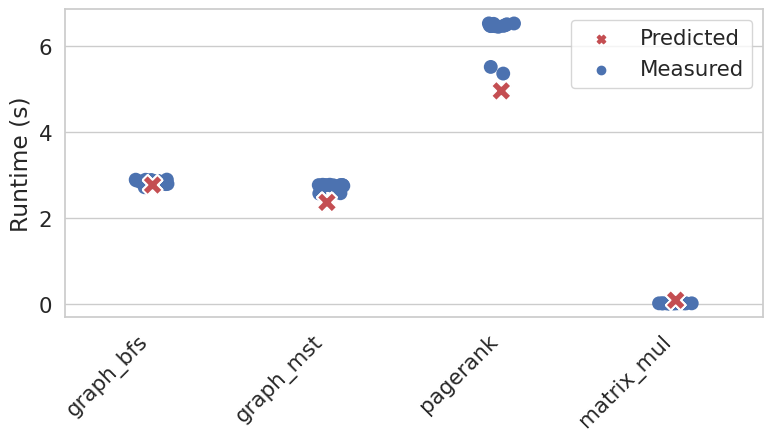

In [357]:
melted = pred_stats[["func_name", "running_duration", "runtime_pred"]].melt(id_vars='func_name', \
                var_name="source", value_name="value_numbers")
melted.loc[melted["source"] == "running_duration", "source"] = "Measured"
melted.loc[melted["source"] == "runtime_pred", "source"] = "Predicted"

markers = {"Measured": "o", "Predicted": "X"}
palette = {"Measured": "b", "Predicted": "r"}

fig, ax = plt.subplots()
g = sns.scatterplot(data=melted[melted["source"] == "Predicted"], x="func_name", y="value_numbers", hue="source", style="source", markers=markers, palette=palette, s=200, ax=ax, zorder=4)
g = sns.stripplot(data=melted[melted["source"] == "Measured"], x="func_name", y="value_numbers", hue="source", ax=ax, zorder=3, s=10)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.set_title(None)
ax.set_ylabel("Runtime (s)")
ax.set_xlabel(None)
plt.savefig("figs/runtime_prediction_accuracy.pdf", bbox_inches="tight")
plt.show()

/tmp/ipykernel_16128/185848987.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


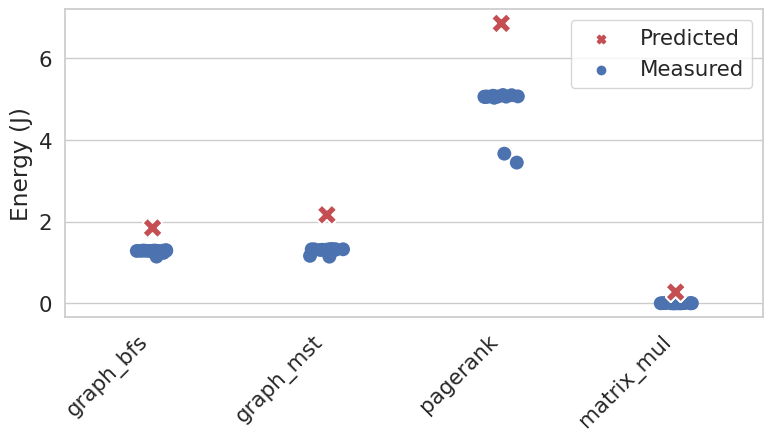

In [356]:
melted = pred_stats[["func_name", "energy_consumed", "energy_pred"]].melt(id_vars='func_name', \
                var_name="source", value_name="value_numbers")
melted.loc[melted["source"] == "energy_consumed", "source"] = "Measured"
melted.loc[melted["source"] == "energy_pred", "source"] = "Predicted"

markers = {"Measured": "o", "Predicted": "X"}
palette = {"Measured": "b", "Predicted": "r"}

fig, ax = plt.subplots()
g = sns.scatterplot(data=melted[melted["source"] == "Predicted"], x="func_name", y="value_numbers", hue="source", style="source", markers=markers, palette=palette, s=200, ax=ax, zorder=4)
g = sns.stripplot(data=melted[melted["source"] == "Measured"], x="func_name", y="value_numbers", hue="source", s=10, ax=ax, zorder=3)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.set_title(None)
ax.set_ylabel("Energy (J)")
ax.set_xlabel(None)

plt.savefig("figs/energy_prediction_accuracy.pdf", bbox_inches="tight")
plt.show()

## Scheduler Eval

### Scheduler Comparison

In [371]:
scheduler_comparison_df = read_jsonl("results/scheduler_comparison.jsonl")
scheduler_comparison_df["energy"] /= 1e9
scheduler_comparison_df["EDP"] = scheduler_comparison_df["energy"]  * scheduler_comparison_df["runtime"]
scheduler_comparison_df["EDP"] /= scheduler_comparison_df["EDP"].min()
scheduler_comparison_df["ED2P"] = (scheduler_comparison_df["energy"]**(1-0.2)) * (scheduler_comparison_df["runtime"]**(2+.2))
scheduler_comparison_df["ED2P_norm"] = scheduler_comparison_df["ED2P"] / scheduler_comparison_df["ED2P"].min()
scheduler_comparison_df

,runtime,energy,strategy,alpha,ntasks,EDP,ED2P,ED2P_norm
0,640.486623,33.461179,desktop,NaN,256,2.240828,2.477166e+07,11.685009
1,656.365008,103.082000,theta,NaN,256,7.074332,6.430818e+07,30.334727
2,340.468985,79.277871,midway,NaN,256,2.822193,1.229963e+07,5.801845
3,707.136596,47.349340,mhra,0.5,256,3.500857,4.065916e+07,19.179282
4,272.325270,69.597247,round_robin,NaN,256,1.981697,6.780584e+06,3.198461
5,209.362372,66.150701,faster,NaN,256,1.448072,3.650939e+06,1.722180
6,175.449167,54.511924,cluster_mhra (alpha=0.2),0.2,256,1.000000,2.119952e+06,1.000000
7,677.484184,34.593052,cluster_mhra (alpha=1),1.0,256,2.450446,2.878520e+07,13.578230


/tmp/ipykernel_16128/278332144.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))


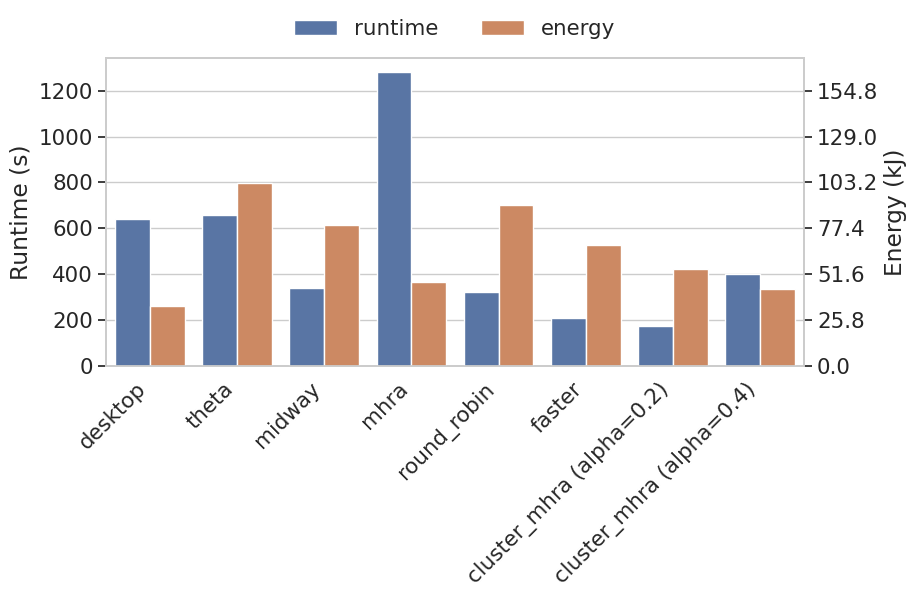

In [363]:
# From: https://stackoverflow.com/questions/51882279/seaborn-barplot-with-two-y-axis
melted = scheduler_comparison_df[["runtime", "energy", "strategy"]].melt(id_vars='strategy', \
                var_name="source", value_name="value_numbers")

mask = melted.source.isin(['energy'])
scale = melted[~mask].value_numbers.mean()/ melted[mask].value_numbers.mean()
melted.loc[mask, 'value_numbers'] = melted.loc[mask, 'value_numbers']*scale

fig, ax1 = plt.subplots()
g = sns.barplot(x='strategy', y="value_numbers", hue="source", data=melted, ax=ax1, zorder=3)
sns.move_legend(
    ax1, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,
)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Runtime (s)')
ax1.grid(axis="y", zorder=0)
ax1.set_xlabel(None)
ax2 = ax1.twinx()
ax2.grid(False)

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))
ax2.set_ylabel('Energy (kJ)')

plt.savefig("figs/scheduler_comparison_vals.pdf", bbox_inches="tight")
plt.show()

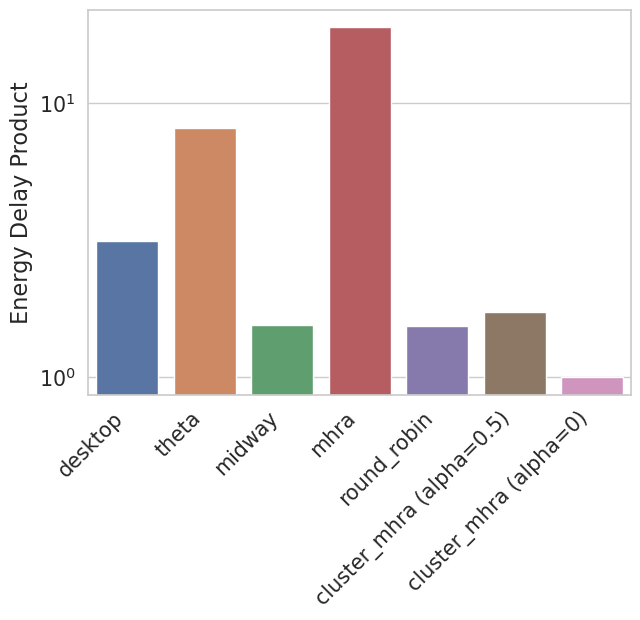

In [313]:
fig, ax1 = plt.subplots()
g = sns.barplot(x='strategy', y="ED2P_norm", data=scheduler_comparison_df, ax=ax1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("Energy Delay Product")
ax1.set_xlabel(None)
ax1.grid(False)
ax1.grid(axis="y", zorder=0)
ax1.set_yscale("log")

plt.savefig("figs/scheduler_comparison_edp.pdf", bbox_inches="tight")
plt.show()

### Scheduler Sensitivity

In [14]:
scheduler_sensitivity_df = read_jsonl("results/scheduler_sensitivity.jsonl")
scheduler_sensitivity_df["energy"] = scheduler_sensitivity_df["energy"] / 1e9
scheduler_sensitivity_df.sort_values(["alpha"], inplace=True)
scheduler_sensitivity_df[["desktop", "midway", "theta", "faster"]] /= 1792
scheduler_sensitivity_df["ED2P"] = (scheduler_sensitivity_df["energy"]**(1-0.2)) * (scheduler_sensitivity_df["runtime"]**(2+.2))
scheduler_sensitivity_df

,runtime,energy,strategy,alpha,ntasks,desktop,theta,midway,faster,ED2P
0,202.336184,68.140204,cluster_mhra,0.0,256,0.008371,0.0,0.071429,0.920201,3.468044e+06
1,175.449167,54.511924,cluster_mhra,0.2,256,0.146205,0.0,0.072545,0.781250,2.119952e+06
2,402.392759,43.187013,cluster_mhra,0.4,256,0.081473,0.0,0.106585,0.811942,1.092730e+07
3,402.359674,42.244683,cluster_mhra,0.6,256,0.078683,0.0,0.135603,0.785714,1.073419e+07
4,651.538187,33.470478,cluster_mhra,0.8,256,0.857143,0.0,0.000000,0.142857,2.572748e+07
5,677.484184,34.593052,cluster_mhra,1.0,256,1.000000,0.0,0.000000,0.000000,2.878520e+07


/tmp/ipykernel_9483/2922180575.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
/tmp/ipykernel_9483/2922180575.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))


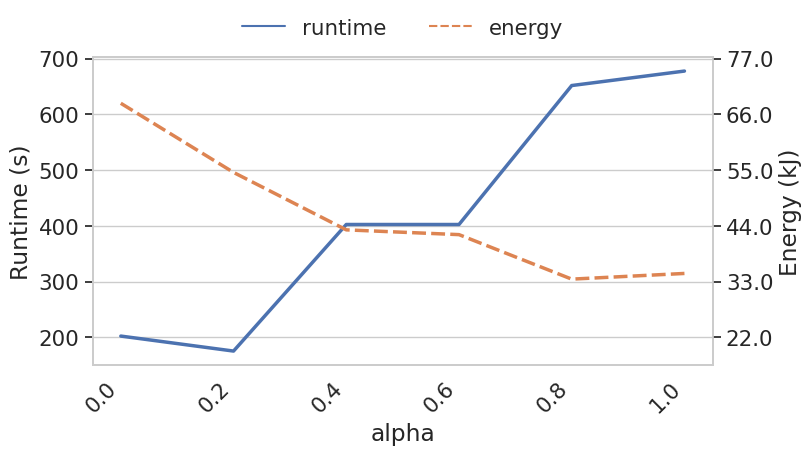

In [15]:
melted = scheduler_sensitivity_df[["runtime", "energy", "alpha"]].melt(id_vars='alpha', \
                var_name="source", value_name="value_numbers")

mask = melted.source.isin(['energy'])
scale = melted[~mask].value_numbers.mean()/ melted[mask].value_numbers.mean()
melted.loc[mask, 'value_numbers'] = melted.loc[mask, 'value_numbers']*scale

fig, ax1 = plt.subplots()
g = sns.lineplot(x='alpha', y="value_numbers", hue="source", data=melted, ax=ax1, zorder=3, style="source", linewidth=2.5)
sns.move_legend(
    ax1, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False
)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Runtime (s)')
# ax1.set_ylim((250, 900))
ax1.grid(False)
ax1.grid(axis="y", zorder=0)
ax2 = ax1.twinx()
ax2.grid(False)

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))
ax2.set_ylabel('Energy (kJ)')

plt.savefig("figs/scheduler_sensitivity.pdf", bbox_inches="tight")
plt.show()

In [24]:
scheduler_sensitivity_df = scheduler_sensitivity_df.rename(columns={"desktop" : "Desktop", "midway": "IC", "theta": "Theta", "faster": "FASTER"})

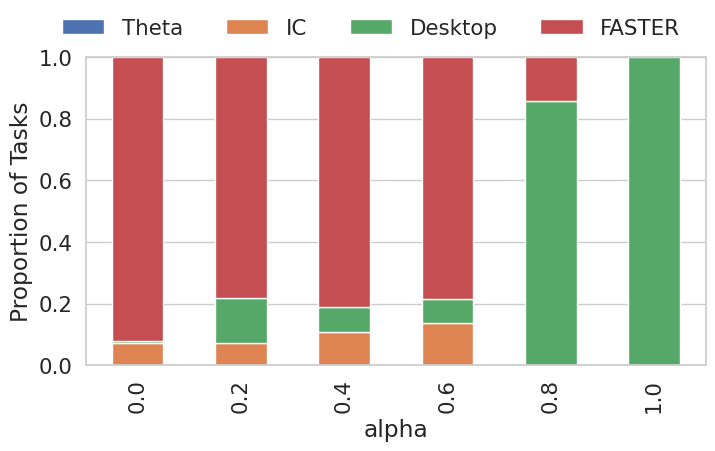

In [27]:
scheduler_sensitivity_df
ax = scheduler_sensitivity_df[["alpha", "Theta", "IC", "Desktop", "FASTER"]].plot.bar(x="alpha", stacked=True)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.46, 1), ncol=4, title=None, frameon=False,
)
ax.set_ylabel("Proportion of Tasks")
ax.set_xlabel("alpha")
ax.set_ylim((0,1))
ax.grid(False)
ax.grid(axis="y", zorder=0)

plt.savefig("figs/scheduler_task_distribution.pdf", bbox_inches="tight")

### Scheduler Overhead

In [369]:
scheduler_overhead_df = read_jsonl("results/scheduler_overhead.jsonl")
scheduler_overhead_df

,strategy,ntasks,runtime
0,mhra,8,1.731081
1,cluster_mhra,8,0.051789
2,round_robin,8,0.000006
3,mhra,16,0.035544
4,cluster_mhra,16,0.026790
5,round_robin,16,0.000006
6,mhra,32,0.046262
7,cluster_mhra,32,0.028562
8,round_robin,32,0.000009
9,mhra,64,0.075263


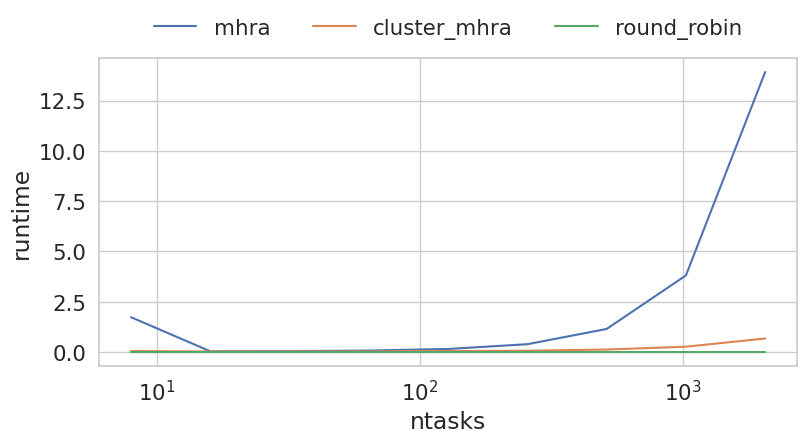

In [370]:
fig, ax = plt.subplots()
g = sns.lineplot(data=scheduler_overhead_df, x="ntasks", y="runtime", hue="strategy", ax=ax)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
ax.set_xscale("log")

plt.savefig("figs/scheduler_overhead.pdf", bbox_inches="tight")
plt.show()

## Molecular Design

In [21]:
mol_design_df = read_jsonl("results/molecular_design_eval.jsonl")
mol_design_df["energy"] = mol_design_df["total_energy"] / 1e9
mol_design_df["EDP"] = mol_design_df["energy"]  * mol_design_df["runtime"]
mol_design_df["EDP"] /= mol_design_df["EDP"].min()
mol_design_df["ED2P"] = (mol_design_df["energy"]**(1-0.2)) * (mol_design_df["runtime"]**(2+.2))
mol_design_df["ED2P_norm"] = mol_design_df["ED2P"] / mol_design_df["ED2P"].min()
# mol_design_df.loc[mol_design_df["strategy"] == "midway", "strategy"] = "IC"
mol_design_df.loc[mol_design_df["strategy"] == "midway", "strategy"] = "Midway"
mol_design_df.loc[mol_design_df["strategy"] == "faster", "strategy"] = "FASTER"
mol_design_df.loc[mol_design_df["strategy"] == "desktop", "strategy"] = "Desktop"
mol_design_df.loc[mol_design_df["strategy"] == "mhra", "strategy"] = "MHRA"
mol_design_df.loc[mol_design_df["strategy"] == "cluster_mhra", "strategy"] = "Cluster MHRA"
mol_design_df

,strategy,runtime,total_energy,energy,EDP,ED2P,ED2P_norm
0,Desktop,2178.759556,1.028954e+11,102.895431,29.159265,8.994507e+08,672.427231
1,Midway,6170.177913,3.388963e+11,338.896342,271.979234,2.305199e+10,17233.614169
2,FASTER,233.560479,6.243002e+10,62.430015,1.896549,4.433976e+06,3.314830
3,MHRA,2145.950496,1.031743e+11,103.174257,28.797993,8.718071e+08,651.760995
4,Cluster MHRA,143.046703,5.374660e+10,53.746597,1.000000,1.337618e+06,1.000000


/tmp/ipykernel_17398/2219089632.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))


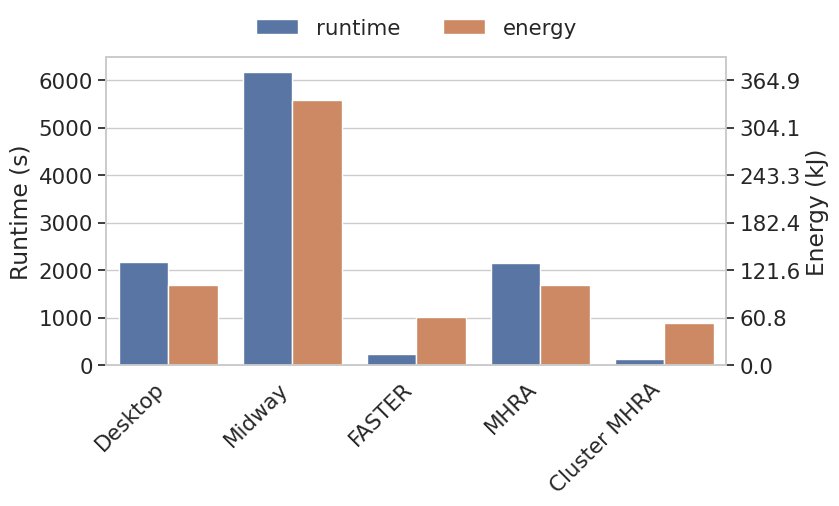

In [22]:
plt.rcParams["figure.figsize"] = (8, 4)

# From: https://stackoverflow.com/questions/51882279/seaborn-barplot-with-two-y-axis
melted = mol_design_df[["runtime", "energy", "strategy"]].melt(id_vars='strategy', \
                var_name="source", value_name="value_numbers")

mask = melted.source.isin(['energy'])
scale = melted[~mask].value_numbers.mean()/ melted[mask].value_numbers.mean()
melted.loc[mask, 'value_numbers'] = melted.loc[mask, 'value_numbers']*scale

fig, ax1 = plt.subplots()
g = sns.barplot(x='strategy', y="value_numbers", hue="source", data=melted, ax=ax1, zorder=3)
sns.move_legend(
    ax1, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,
)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Runtime (s)')
ax1.grid(axis="y", zorder=0)
ax1.set_xlabel(None)
ax2 = ax1.twinx()
ax2.grid(False)

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))
ax2.set_ylabel('Energy (kJ)')

plt.savefig("figs/mol_desgin_comparison.pdf", bbox_inches="tight")
plt.show()